In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import art3d
from scipy.optimize import curve_fit
from scipy.stats import chisquare

In [2]:
g4_df = pd.read_csv("../muon_rtd_2023-06-01_165701/g4_output.txt")
resets_df = pd.read_csv("../muon_rtd_2023-06-01_165701/resets_output.txt")

int_stats_df = pd.read_pickle("int_stats_df.pkl")
event0_g4_df = pd.read_pickle("event0_g4_df.pkl")
resets_df_micro = pd.read_pickle("resets_df_micro.pkl")
event0_resets_df_micro = pd.read_pickle("event0_resets_df_micro.pkl")
active_pixels_df = pd.read_pickle("active_pixels_df.pkl")
pixel_stats_df = pd.read_pickle("pixel_stats_df.pkl")

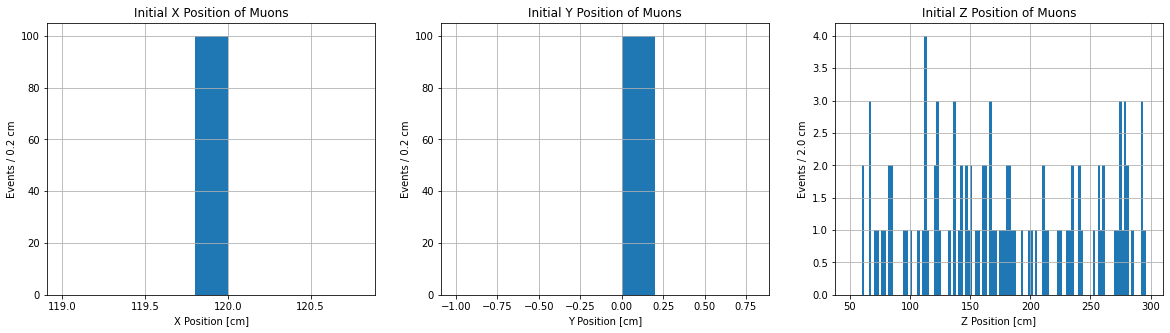

In [3]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
int_stats_df["xi_muon"].hist(ax=axes[0], bins=np.arange(119, 121, 0.2))
axes[0].locator_params(axis='x', nbins=6)
axes[0].set_title('Initial X Position of Muons')
axes[0].set_xlabel('X Position [cm]')
axes[0].set_ylabel('Events / 0.2 cm')
int_stats_df["yi_muon"].hist(ax=axes[1], bins=np.arange(-1, 1, 0.2))
axes[1].set_title('Initial Y Position of Muons')
axes[1].set_xlabel('Y Position [cm]')
axes[1].set_ylabel('Events / 0.2 cm')
int_stats_df["zi_muon"].hist(ax=axes[2], bins=np.arange(50, 300, 2))
axes[2].set_title('Initial Z Position of Muons')
axes[2].set_xlabel('Z Position [cm]')
axes[2].set_ylabel('Events / 2.0 cm')
axes[0].plot
axes[1].plot
axes[2].plot
plt.savefig('Muon_Positions.png', dpi=1200)

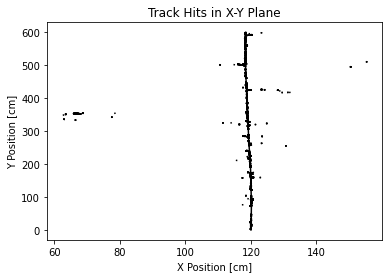

In [4]:
fig = plt.figure()
for idx,row in event0_g4_df.iterrows():
    plt.plot([row.xi, row.xf], [row.yi, row.yf], 'k-') 
plt.title("Track Hits in X-Y Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Y Position [cm]")
plt.savefig('HitTracks_XY.png', dpi=1200)

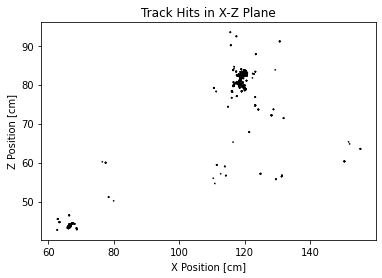

In [5]:
fig = plt.figure()
for idx,row in event0_g4_df.iterrows():
    plt.plot([row.xi, row.xf], [row.zi, row.zf], 'k-') 
plt.title("Track Hits in X-Z Plane")
plt.xlabel("X Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_XZ.png', dpi=1200)

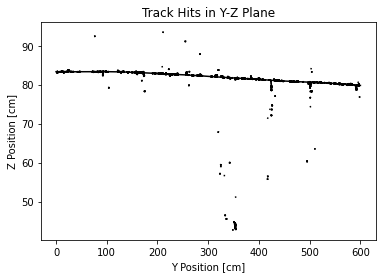

In [6]:
fig = plt.figure()
for idx,row in event0_g4_df.iterrows():
    plt.plot([row.yi, row.yf], [row.zi, row.zf], 'k-') 
plt.title("Track Hits in Y-Z Plane")
plt.xlabel("Y Position [cm]")
plt.ylabel("Z Position [cm]")
plt.savefig('HitTracks_YZ.png', dpi=1200)

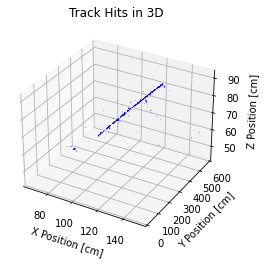

In [7]:
xi_0= event0_g4_df.xi
xf_0= event0_g4_df.xf
yi_0= event0_g4_df.yi
yf_0= event0_g4_df.yf
zi_0= event0_g4_df.zi
zf_0= event0_g4_df.zf

def draw_3d_lines(xi, yi, zi, xf, yf, zf):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for i in range(len(xi)):
        line = art3d.Line3D([xi[i], xf[i]], [yi[i], yf[i]], [zi[i], zf[i]], ls='-', lw='0.25', color='b')
        ax.add_line(line)
    
    plt.title("Track Hits in 3D")
    ax.set_xlabel("X Position [cm]")
    ax.set_ylabel("Y Position [cm]")
    ax.set_zlabel("Z Position [cm]")
    ax.set_xlim3d([np.min(xi), np.max(xf)])
    ax.set_ylim3d([np.min(yi), np.max(yf)])
    ax.set_zlim3d([np.min(zi), np.max(zf)])
    ax.plot

draw_3d_lines(xi_0, yi_0, zi_0, xf_0, yf_0, zf_0)
plt.savefig('HitTracks_3D.png', dpi=1200)

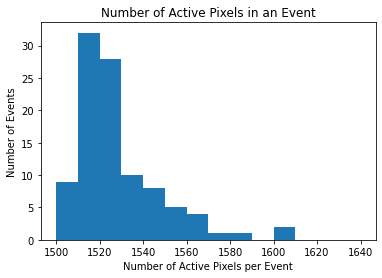

In [8]:
plt.hist(active_pixels_df.active_pixels, bins=np.arange(1500, 1650, 10))
plt.title("Number of Active Pixels in an Event")
plt.xlabel("Number of Active Pixels per Event")
plt.ylabel("Number of Events")
plt.savefig('Active_Pixels_in_Event.png', dpi=1200)

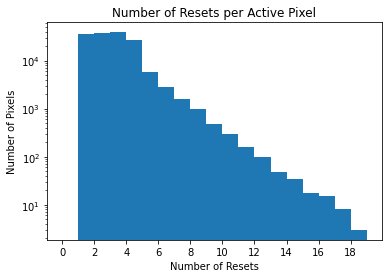

In [9]:
plt.hist(pixel_stats_df.resets, bins=np.arange(0, 20, 1))
plt.xticks(range(0,20,2))
plt.yscale("log")
plt.title("Number of Resets per Active Pixel")
plt.xlabel("Number of Resets")
plt.ylabel("Number of Pixels")
plt.savefig('Resets_per_Pixel.png', dpi=1200)

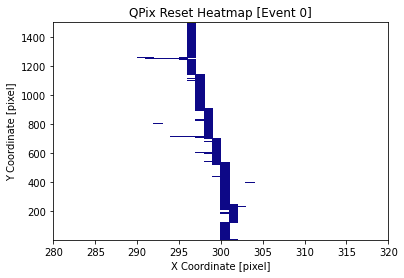

In [10]:
xbin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_x) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_x)
ybin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_y) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 0].pix_x, pixel_stats_df[pixel_stats_df.event == 0].pix_y, bins=[xbin_range_one,ybin_range_one], cmin=1, cmap='plasma')
plt.xlim(280,320)
plt.title("QPix Reset Heatmap [Event 0]")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_OneEvent.png', dpi=1200)

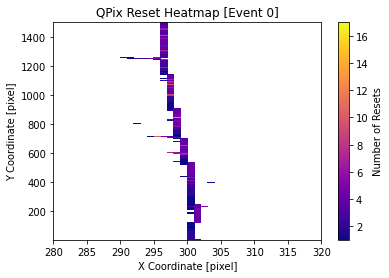

In [11]:
xbin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_x) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_x)
ybin_range_one = max(pixel_stats_df[pixel_stats_df.event == 0].pix_y) - min(pixel_stats_df[pixel_stats_df.event == 0].pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 0].pix_x, pixel_stats_df[pixel_stats_df.event == 0].pix_y, bins=[xbin_range_one,ybin_range_one], weights=pixel_stats_df[pixel_stats_df.event == 0].resets, cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.xlim(280,320)
plt.title("QPix Reset Heatmap [Event 0]")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_OneEvent_Weighted.png', dpi=1200)

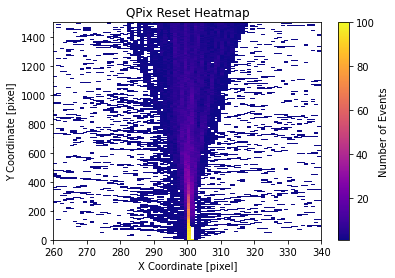

In [12]:
xbin_range = max(pixel_stats_df.pix_x) - min(pixel_stats_df.pix_x)
ybin_range = max(pixel_stats_df.pix_y) - min(pixel_stats_df.pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df.pix_x, pixel_stats_df.pix_y, bins=[xbin_range,ybin_range], cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Events')
plt.xlim(260,340)
plt.title("QPix Reset Heatmap")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap.png', dpi=1200)

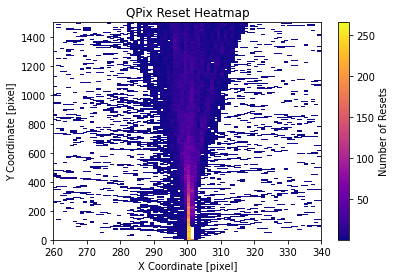

In [13]:
xbin_range = max(pixel_stats_df.pix_x) - min(pixel_stats_df.pix_x)
ybin_range = max(pixel_stats_df.pix_y) - min(pixel_stats_df.pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df.pix_x, pixel_stats_df.pix_y, bins=[xbin_range,ybin_range], weights=pixel_stats_df.resets, cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.xlim(260,340)
plt.title("QPix Reset Heatmap")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_Weighted.png', dpi=1200)

<ipython-input-14-9f80792d6309>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(event0_resets_df_micro[event0_resets_df_micro.pixel_x == 300][event0_resets_df_micro.pixel_y == 534].reset_time)


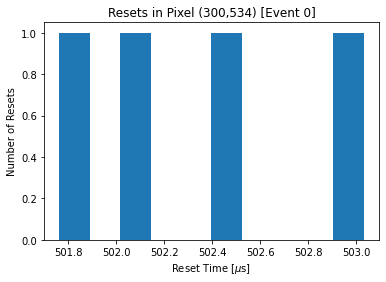

In [14]:
fig = plt.figure()
plt.hist(event0_resets_df_micro[event0_resets_df_micro.pixel_x == 300][event0_resets_df_micro.pixel_y == 534].reset_time)
plt.ylabel("Number of Resets")
plt.xlabel("Reset Time [$\mu$s]")
plt.title("Resets in Pixel (300,534) [Event 0]")
plt.savefig('ResetHist_OneEvent.png', dpi=1200)

<ipython-input-15-6f13c4637612>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].RMS*1e-6, s=2)
<ipython-input-15-6f13c4637612>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].RMS*1e-6, s=2)


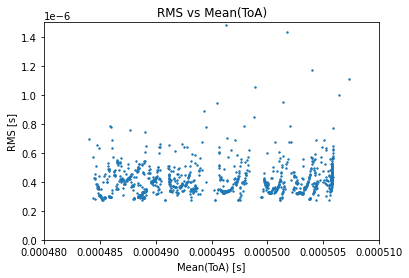

In [15]:
fig = plt.figure()
plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.event == 0].RMS*1e-6, s=2)
plt.xlim([480*1e-6, 510*1e-6])
plt.ylim([0,1.5*1e-6])
plt.ylabel("RMS [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("RMS vs Mean(ToA)")
plt.savefig('MeanReset_vs_RMS_OneEvent.png', dpi=1200)

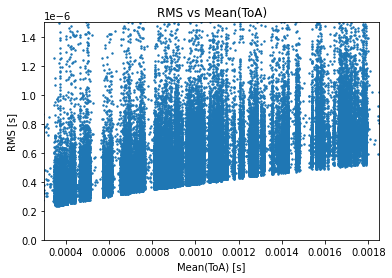

In [16]:
fig = plt.figure()
plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.resets > 2].RMS*1e-6, s=2)
plt.xlim([300*1e-6, 1850*1e-6])
plt.ylim([0,1.5*1e-6])
plt.ylabel("RMS [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("RMS vs Mean(ToA)")
plt.savefig('MeanReset_vs_RMS.png', dpi=1200)

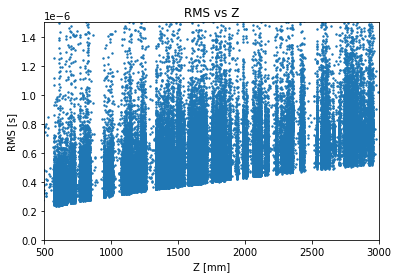

In [17]:
fig = plt.figure()
plt.scatter(pixel_stats_df[pixel_stats_df.resets > 2].mean_ToA*1.648, pixel_stats_df[pixel_stats_df.resets > 2].RMS*1e-6, s=2)
plt.xlim([500, 3000])
plt.ylim([0,1.5*1e-6])
plt.ylabel("RMS [s]")
plt.xlabel("Z [mm]")
plt.title("RMS vs Z")
plt.savefig('Z_vs_RMS.png', dpi=1200)

In [18]:
minToA = 400
maxToA = 1600
bins = 20
bw = (maxToA-minToA)/bins

minRMSarr = []
minToAarr = []
RMSbinsarr = []

for i in range(0, bins):
        minRMSarr.append(min(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)].RMS))
        minToAarr.append(minToA+bw*i)
        RMSbinsarr.append((pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)][pixel_stats_df.RMS < 2].RMS))

<ipython-input-18-5c71963f4c94>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSarr.append(min(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)].RMS))
<ipython-input-18-5c71963f4c94>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSarr.append(min(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)].RMS))
<ipython-input-18-5c71963f4c94>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RMSbinsarr.append((pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)][pixel_stats_df.RMS < 2].RMS))
<ipython-input-18-5c71963f4c94>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RMSbinsarr.appe

<ipython-input-18-5c71963f4c94>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSarr.append(min(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)].RMS))
<ipython-input-18-5c71963f4c94>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSarr.append(min(pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)].RMS))
<ipython-input-18-5c71963f4c94>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RMSbinsarr.append((pixel_stats_df[pixel_stats_df.resets > 2][pixel_stats_df.mean_ToA > ((minToA+bw*i) - bw/2)][pixel_stats_df.mean_ToA < ((minToA+bw*i) + bw/2)][pixel_stats_df.RMS < 2].RMS))
<ipython-input-18-5c71963f4c94>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  RMSbinsarr.appe

<ipython-input-19-d27fdc353dd8>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  RMSbins = np.multiply(RMSbinsarr,1e-6)


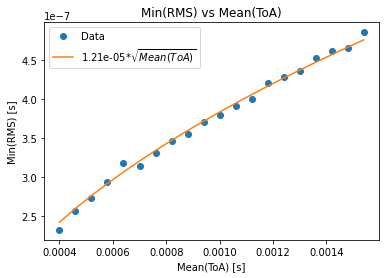

In [19]:
minRMS = np.multiply(minRMSarr,1e-6)
minToA = np.multiply(minToAarr,1e-6)
RMSbins = np.multiply(RMSbinsarr,1e-6)

def sqrt_func(t, a):
    y = a*np.sqrt(t)
    return y

par_min, cov_min = curve_fit(sqrt_func, minToA, minRMS)
fit_a_min = par_min[0]

min_fit = sqrt_func(minToA, fit_a_min)

fig = plt.figure()
plt.plot(minToA, minRMS, 'o', label='Data')
plt.plot(minToA, min_fit, '-', label='{:0.3}$*\sqrt{{Mean(ToA)}}$'.format(fit_a_min))
plt.ylabel("Min(RMS) [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("Min(RMS) vs Mean(ToA)")
plt.legend()
plt.savefig('Mean_ToA_vs_Min_RMS.png', dpi=1200)

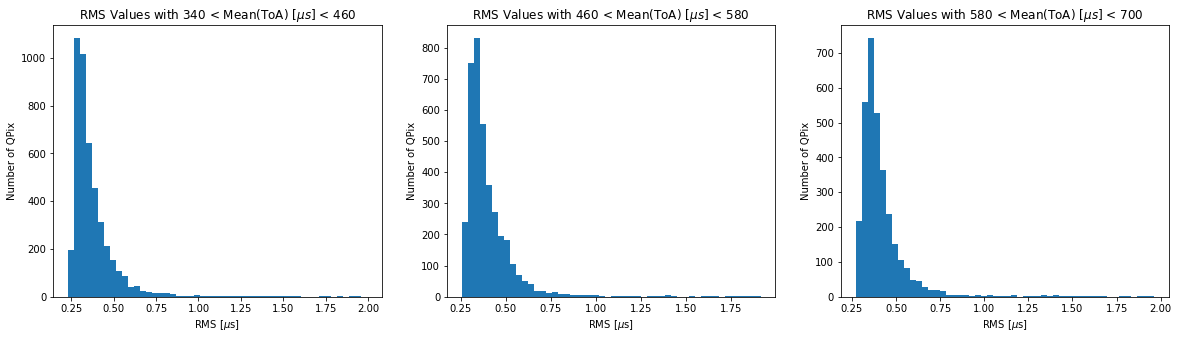

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(20,5))
RMSbinsarr[0].hist(ax=axes[0],  bins=50)
axes[0].set_ylabel("Number of QPix")
axes[0].set_xlabel("RMS [$\mu$s] ")
axes[0].set_title("RMS Values with 340 < Mean(ToA) [$\mu s$] < 460")
RMSbinsarr[1].hist(ax=axes[1],  bins=50)
axes[1].set_ylabel("Number of QPix")
axes[1].set_xlabel("RMS [$\mu$s] ")
axes[1].set_title("RMS Values with 460 < Mean(ToA) [$\mu s$] < 580")
RMSbinsarr[2].hist(ax=axes[2],  bins=50)
axes[2].set_ylabel("Number of QPix")
axes[2].set_xlabel("RMS [$\mu$s] ")
axes[2].set_title("RMS Values with 580 < Mean(ToA) [$\mu s$] < 700")
axes[0].grid(False)
axes[1].grid(False)
axes[2].grid(False)
axes[0].plot
axes[1].plot
axes[2].plot
plt.savefig('RMS_values_at_Mean_ToA.png', dpi=1200)

In [21]:
meanRMS=[]
for i in range(0, bins):
    meanRMS.append(np.mean(RMSbins[i]))

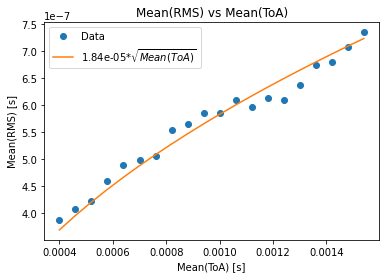

In [22]:
par_mean, cov_mean = curve_fit(sqrt_func, minToA, meanRMS)
fit_a_mean = par_mean[0]

mean_fit = sqrt_func(minToA, fit_a_mean)

fig = plt.figure()
plt.plot(minToA, meanRMS, 'o', label='Data')
plt.plot(minToA, mean_fit, '-', label='{:0.3}$*\sqrt{{Mean(ToA)}}$'.format(fit_a_mean))
plt.ylabel("Mean(RMS) [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("Mean(RMS) vs Mean(ToA)")
plt.legend()
plt.savefig('Mean_ToA_vs_Mean_RMS.png', dpi=1200)

In [23]:
minRMSEventarr = []
minToAEventarr = []
minEventNumEventarr = []
minpixxEventarr = []
minpixyEventarr = []

min([], default="EMPTY")
for i in range(0, 100):
    if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
        minRMSEventarr.append(min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0))
        minToAEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['mean_ToA'].iloc[0])
        minpixxEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['pix_x'].iloc[0])    
        minpixyEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['pix_y'].iloc[0])          
        minEventNumEventarr.append(i)

minEvent_df = pd.DataFrame()    
minEvent_df['ToA']=pd.Series(np.multiply(minToAEventarr,1e-6))
minEvent_df['RMS']=pd.Series(np.multiply(minRMSEventarr,1e-6))
minEvent_df['event']=pd.Series(minEventNumEventarr)
minEvent_df['pix_x']=pd.Series(minpixxEventarr)
minEvent_df['pix_y']=pd.Series(minpixyEventarr)
minEvent_df = minEvent_df.sort_values(by=['ToA'])

<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
<ipython-input-23-4c82c1d4bcad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSEventarr.append(min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0))
<ipython-input-23-4c82c1d4bcad>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minToAEventarr.append(pixel_stats_df[pix

<ipython-input-23-4c82c1d4bcad>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minpixxEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['pix_x'].iloc[0])
<ipython-input-23-4c82c1d4bcad>:13: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minpixyEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['pix_y'].iloc[0])
<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and

<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
<ipython-input-23-4c82c1d4bcad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSEventarr.append(min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0))
<ipython-input-23-4c82c1d4bcad>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minToAEventarr.append(pixel_stats_df[pix

<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
<ipython-input-23-4c82c1d4bcad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSEventarr.append(min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0))
<ipython-input-23-4c82c1d4bcad>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minToAEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['mean_ToA'].iloc[0])
<ipython-input-23-4c82c1d4bcad>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minpixxEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['p

<ipython-input-23-4c82c1d4bcad>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) > 0 and min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0) < 1.25:
<ipython-input-23-4c82c1d4bcad>:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minRMSEventarr.append(min(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.resets > 7].RMS, default=0))
<ipython-input-23-4c82c1d4bcad>:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minToAEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['mean_ToA'].iloc[0])
<ipython-input-23-4c82c1d4bcad>:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  minpixxEventarr.append(pixel_stats_df[pixel_stats_df.event == i][pixel_stats_df.RMS == minRMSEventarr[-1]]['p

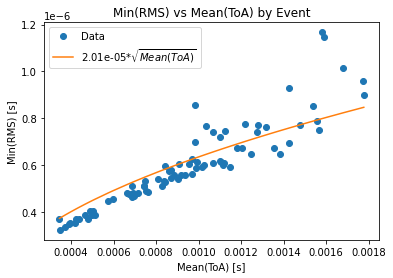

In [24]:
par_min_Event, cov_min_Event = curve_fit(sqrt_func, minEvent_df.ToA, minEvent_df.RMS, p0=2e-5)
fit_a_min_Event = par_min_Event[0]

min_fit_Event = sqrt_func(minEvent_df.ToA, fit_a_min_Event)

fig = plt.figure()
plt.plot(minEvent_df.ToA, minEvent_df.RMS, 'o', label='Data')
plt.plot(minEvent_df.ToA, min_fit_Event, '-', label='{:0.3}$*\sqrt{{Mean(ToA)}}$'.format(fit_a_min_Event))
plt.ylabel("Min(RMS) [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("Min(RMS) vs Mean(ToA) by Event")
plt.legend()
plt.savefig('Mean_ToA_vs_Min_RMS_perEvent.png', dpi=1200)

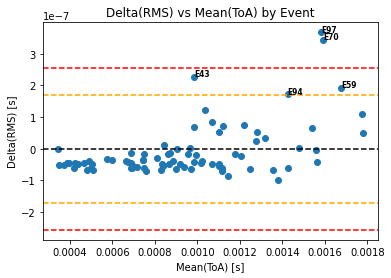

In [25]:
deltaRMS = minEvent_df.RMS-min_fit_Event

fig = plt.figure()
plt.plot(minEvent_df.ToA, deltaRMS, 'o', label='Data')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=deltaRMS.std() * 3, color='r', linestyle='--')
plt.axhline(y=-deltaRMS.std() * 3, color='r', linestyle='--')
plt.axhline(y=deltaRMS.std() * 2, color='orange', linestyle='--')
plt.axhline(y=-deltaRMS.std() * 2, color='orange', linestyle='--')
plt.ylabel("Delta(RMS) [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("Delta(RMS) vs Mean(ToA) by Event")

for i in range(0, len(deltaRMS)):
    if deltaRMS[i] > deltaRMS.std() * 2:
        plt.annotate('E{}'.format(minEvent_df.event[i]), (minEvent_df.ToA[i], deltaRMS[i]), weight='bold', fontsize=7.5)

        
plt.savefig('Mean_ToA_vs_Delta_RMS_perEvent.png', dpi=1200)

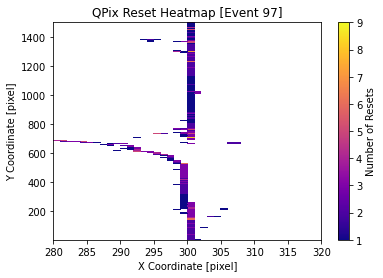

In [26]:
xbin_range_97 = max(pixel_stats_df[pixel_stats_df.event == 97].pix_x) - min(pixel_stats_df[pixel_stats_df.event == 97].pix_x)
ybin_range_97 = max(pixel_stats_df[pixel_stats_df.event == 97].pix_y) - min(pixel_stats_df[pixel_stats_df.event == 97].pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 97].pix_x, pixel_stats_df[pixel_stats_df.event == 97].pix_y, bins=[xbin_range_97,ybin_range_97], weights=pixel_stats_df[pixel_stats_df.event == 97].resets, cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.xlim(280,320)
plt.title("QPix Reset Heatmap [Event 97]")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_Event97_Weighted.png', dpi=1200)

<ipython-input-27-ac3d3ad0456f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(resets_df_micro[resets_df_micro.event == 97][resets_df_micro.pixel_x == 300][resets_df_micro.pixel_y == 709].reset_time, bins=25)
<ipython-input-27-ac3d3ad0456f>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(resets_df_micro[resets_df_micro.event == 97][resets_df_micro.pixel_x == 300][resets_df_micro.pixel_y == 709].reset_time, bins=25)


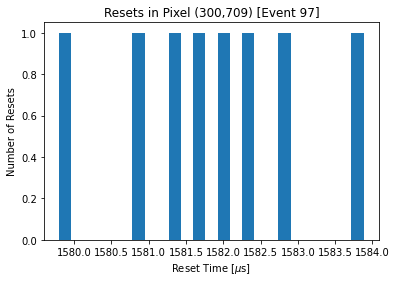

In [27]:
fig = plt.figure()
plt.hist(resets_df_micro[resets_df_micro.event == 97][resets_df_micro.pixel_x == 300][resets_df_micro.pixel_y == 709].reset_time, bins=25)
plt.ylabel("Number of Resets")
plt.xlabel("Reset Time [$\mu$s]")
plt.title("Resets in Pixel (300,709) [Event 97]")
plt.savefig('ResetHist_Event97.png', dpi=1200)

<ipython-input-28-4a2b43a3b2a9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist2d(pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].RMS*1e-6, bins=[400,400], weights=pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].resets, range=([1200*1e-6, 1850*1e-6],[0,1.5*1e-6]), cmin=1, cmap='plasma')
<ipython-input-28-4a2b43a3b2a9>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist2d(pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].RMS*1e-6, bins=[400,400], weights=pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].resets, range=([1200*1e-6, 1850*1e-6],[0,1.5*1e-6]), cmin=1, cmap='plasma')
<ipython-input-28-4a2b43a3b2a9>:2: UserWarning: Boolean Series key will be reindex

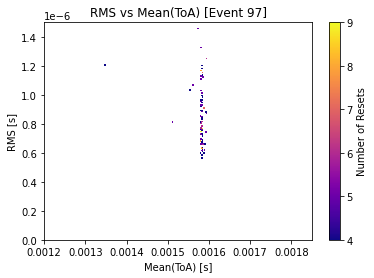

In [28]:
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].RMS*1e-6, bins=[400,400], weights=pixel_stats_df[pixel_stats_df.event == 97][pixel_stats_df.resets > 3].resets, range=([1200*1e-6, 1850*1e-6],[0,1.5*1e-6]), cmin=1, cmap='plasma')
plt.ylabel("RMS [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("RMS vs Mean(ToA) [Event 97]")
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.savefig('MeanReset_vs_RMS_Event97.png', dpi=1200)

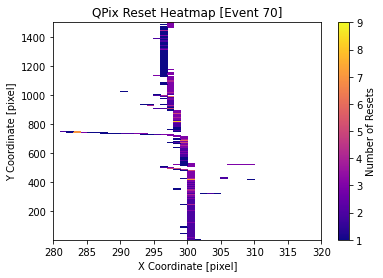

In [29]:
xbin_range_70 = max(pixel_stats_df[pixel_stats_df.event == 70].pix_x) - min(pixel_stats_df[pixel_stats_df.event == 70].pix_x)
ybin_range_70 = max(pixel_stats_df[pixel_stats_df.event == 70].pix_y) - min(pixel_stats_df[pixel_stats_df.event == 70].pix_y)
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 70].pix_x, pixel_stats_df[pixel_stats_df.event == 70].pix_y, bins=[xbin_range_70,ybin_range_70], weights=pixel_stats_df[pixel_stats_df.event == 70].resets, cmin=1, cmap='plasma')
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.xlim(280,320)
plt.title("QPix Reset Heatmap [Event 70]")
plt.xlabel("X Coordinate [pixel]")
plt.ylabel("Y Coordinate [pixel]")
plt.savefig('QPix_Heatmap_Event70_Weighted.png', dpi=1200)

<ipython-input-30-cc12502c7bea>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(resets_df_micro[resets_df_micro.event == 70][resets_df_micro.pixel_x == 298][resets_df_micro.pixel_y == 819].reset_time, bins=25)
<ipython-input-30-cc12502c7bea>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist(resets_df_micro[resets_df_micro.event == 70][resets_df_micro.pixel_x == 298][resets_df_micro.pixel_y == 819].reset_time, bins=25)


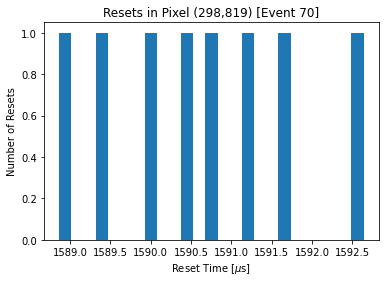

In [30]:
fig = plt.figure()
plt.hist(resets_df_micro[resets_df_micro.event == 70][resets_df_micro.pixel_x == 298][resets_df_micro.pixel_y == 819].reset_time, bins=25)
plt.ylabel("Number of Resets")
plt.xlabel("Reset Time [$\mu$s]")
plt.title("Resets in Pixel (298,819) [Event 70]")
plt.savefig('ResetHist_Event70.png', dpi=1200)

<ipython-input-31-972bdad3ffee>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist2d(pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].RMS*1e-6, bins=[400,400], weights=pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].resets, range=([1200*1e-6, 1850*1e-6],[0,1.5*1e-6]), cmin=1, cmap='plasma')
<ipython-input-31-972bdad3ffee>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  plt.hist2d(pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].RMS*1e-6, bins=[400,400], weights=pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].resets, range=([1200*1e-6, 1850*1e-6],[0,1.5*1e-6]), cmin=1, cmap='plasma')
<ipython-input-31-972bdad3ffee>:2: UserWarning: Boolean Series key will be reindex

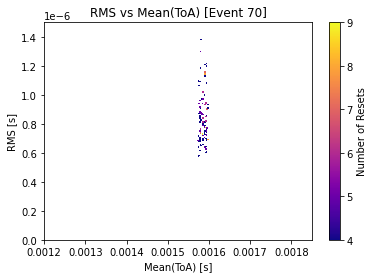

In [31]:
fig = plt.figure()
plt.hist2d(pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].mean_ToA*1e-6, pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].RMS*1e-6, bins=[400,400], weights=pixel_stats_df[pixel_stats_df.event == 70][pixel_stats_df.resets > 3].resets, range=([1200*1e-6, 1850*1e-6],[0,1.5*1e-6]), cmin=1, cmap='plasma')
plt.ylabel("RMS [s]")
plt.xlabel("Mean(ToA) [s]")
plt.title("RMS vs Mean(ToA) [Event 70]")
cb = plt.colorbar()
cb.set_label('Number of Resets')
plt.savefig('MeanReset_vs_RMS_Event70.png', dpi=1200)